<a href="https://colab.research.google.com/github/adurugkar/Deeplearning/blob/main/ANN_stepbystep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Classification problem

In [ ]:
## Divie the dataset into independent and dependent features
x=dataset.iloc[:,3:13]
y =dataset.iloc[:,13]

In [ ]:
# ferature Engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [ ]:
##concatenate these variables with dataframe
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
## concat the geography , gender and x
x = pd.concat([x,geography,gender],axis=1)

In [ ]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
2967,579,39,5,117833.30,3,0,0,5831.00,1,0,0
700,750,32,5,0.00,2,1,0,95611.47,0,0,0
3481,729,34,9,53299.96,2,1,1,42855.97,0,1,0
1621,689,38,5,75075.14,1,1,1,8651.92,0,1,1
800,605,52,7,0.00,2,1,1,173952.50,0,0,1


In [ ]:
# feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU, ReLU

In [ ]:
# lets initialize the ANN
classifier = Sequential()

In [ ]:
## Adding the input layer and first hidden layer
classifier.add(Dense(10, input_shape=(11,),activation='relu'))

In [ ]:
## adding the second hidden layer
classifier.add(Dense(units=10, activation='relu'))
# classifier.add(Dropout(0.3)) # only use it when our model is overfitted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## adding Therd hidden layer
classifier.add(Dense(units=10, activation='relu'))
# classifier.add(Dropout(0.2))

In [ ]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                120       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


total param mean total number of weight and bias

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)# this optimizers is resposible for training

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
## early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta=0.0001,
    patience = 20,
    verbose = 1,
    mode ='auto',
    baseline = None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(x_train,y_train, validation_data =(x_test,y_test),validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
750/750 [==============================] - 3s 3ms/step - loss: 0.4103 - accuracy: 0.8283 - val_loss: 0.3602 - val_accuracy: 0.8524
Epoch 2/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3570 - accuracy: 0.8516 - val_loss: 0.3439 - val_accuracy: 0.8572
Epoch 3/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8581 - val_loss: 0.3459 - val_accuracy: 0.8604
Epoch 4/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3489 - accuracy: 0.8560 - val_loss: 0.3444 - val_accuracy: 0.8616
Epoch 5/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3488 - accuracy: 0.8549 - val_loss: 0.3446 - val_accuracy: 0.8548
Epoch 6/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3498 - accuracy: 0.8571 - val_loss: 0.3410 - val_accuracy: 0.8588
Epoch 7/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.3461 - accuracy: 0.8596 - val_loss: 0.3568 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

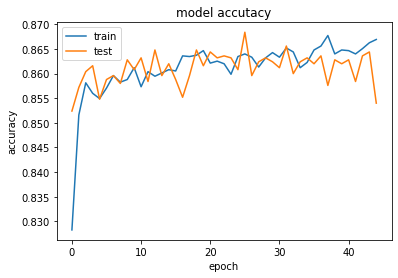

In [ ]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accutacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

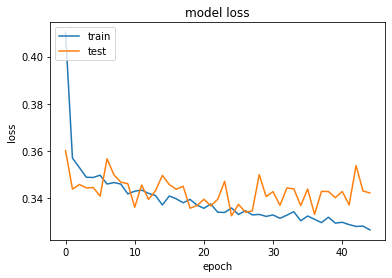

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')

In [ ]:
## making the predication and evaluating the model
# predicting the test set result
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)# here you can check the threshold using ROC and AUC curve

79/79 [==============================] - 0s 2ms/step


In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1867,  124],
       [ 241,  268]])

In [ ]:
## calcuate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.854

In [ ]:
## get the weights
classifier.get_weights()

[array([[ 8.4198129e-01, -5.3739244e-01,  4.6992093e-02, -1.4828686e-02,
         -1.1301863e+00, -5.0229585e-01, -1.5178747e+00,  6.9219369e-01,
         -4.5215654e-01,  2.2543456e-01],
        [-1.9804720e+00, -1.9692508e+00,  9.4657582e-01,  5.6474173e-01,
          2.1807013e-01,  4.5786619e+00, -1.6617379e+00,  1.6969732e+00,
          3.0643120e+00, -2.0732892e+00],
        [ 2.6192409e-01, -5.0466221e-02,  1.9099261e-01,  1.5772133e-01,
          5.2587849e-01, -3.9164335e-01, -1.9739319e+00,  5.8242422e-01,
          4.5296481e-01,  1.0520546e+00],
        [-1.5234028e+00, -3.1334929e+00,  7.6944470e-01, -3.4503741e+00,
         -9.3817306e-01,  7.1355742e-01, -1.2147259e+00, -2.0166898e+00,
         -9.3269676e-01, -1.6082374e+00],
        [-2.1057265e-01,  7.4988681e-01,  3.7613819e+00, -4.0916510e+00,
          7.4244314e-01, -1.5614187e+00, -4.2346844e-01, -8.0659610e-01,
         -4.9104881e-02,  5.4953396e-01],
        [ 1.2346400e+00, -1.2504460e-01, -2.9419109e-01, -7.

In [ ]:
## save the file in .h5 file
classifier.save('model.h5')

In [ ]:
## loading h5 file 
from tensorflow import keras
classifier1 = keras.models.load_model('model.h5')

In [ ]:
classifier1.predict(x_test)

79/79 [==============================] - 0s 2ms/step


array([[0.28202236],
       [0.30957535],
       [0.16385204],
       ...,
       [0.17253208],
       [0.09641553],
       [0.05365394]], dtype=float32)

## Regression problem

In [ ]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
x=dataset[['RowNumber',  'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]
y = dataset['EstimatedSalary' ]

In [ ]:
# ferature Engineering
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [ ]:
##concatenate these variables with dataframe
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
## concat the geography , gender and x
x = pd.concat([x,geography,gender],axis=1)

In [ ]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
2967,2968,579,39,5,117833.30,3,0,0,1,1,0,0
700,701,750,32,5,0.00,2,1,0,0,0,0,0
3481,3482,729,34,9,53299.96,2,1,1,0,0,1,0
1621,1622,689,38,5,75075.14,1,1,1,1,0,1,1
800,801,605,52,7,0.00,2,1,1,0,0,0,1


In [ ]:
# feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:

## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU, ReLU

# lets initialize the ANN
regressor = Sequential()

## Adding the input layer and first hidden layer
regressor.add(Dense(10, input_shape=(12,),activation='relu'))

## adding the second hidden layer
regressor.add(Dense(units=10, activation='relu'))

## adding Therd hidden layer
regressor.add(Dense(units=10, activation='relu'))

## adding the output layer
regressor.add(Dense(1, activation='linear'))

regressor.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                130       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow
mse = tensorflow.keras.losses.MeanSquaredError(name = 'mean_squared_error')
metrics = tensorflow.keras.metrics.MeanSquaredError(name = 'mean_sqared_error', dtype = None)

In [ ]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [ ]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_mean_squared_error',
    patience = 5
)

In [ ]:
model_history = regressor.fit(x_train,y_train, validation_data =(x_test,y_test),validation_split=0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
739/750 [============================>.] - ETA: 0s - loss: 3980886528.0000 - mae: 52843.3789

750/750 [==============================] - 3s 3ms/step - loss: 3971972096.0000 - mae: 52815.0430 - val_loss: 3391403520.0000 - val_mae: 50186.1211
Epoch 2/100
731/750 [============================>.] - ETA: 0s - loss: 3363706368.0000 - mae: 49920.4062

750/750 [==============================] - 2s 3ms/step - loss: 3351097600.0000 - mae: 49807.3359 - val_loss: 3420848128.0000 - val_mae: 50257.6836
Epoch 3/100
732/750 [============================>.] - ETA: 0s - loss: 3345965056.0000 - mae: 49832.6172

750/750 [==============================] - 2s 3ms/step - loss: 3340735744.0000 - mae: 49787.6875 - val_loss: 3353790464.0000 - val_mae: 49752.3789
Epoch 4/100
735/750 [============================>.] - ETA: 0s - loss: 3323484416.0000 - mae: 49718.6289

750/750 [==============================] - 2s 3ms/step - loss: 3329259008.0000 - mae: 49768.1680 - val_loss: 3368051712.0000 - val_mae: 50028.9141
Epoch 5/100
735/750 [============================>.] - ETA: 0s - loss: 3319006976.0000 - mae: 49653.9062

750/750 [==============================] - 2s 3ms/step - loss: 3321138944.0000 - mae: 49674.4883 - val_loss: 3335538176.0000 - val_mae: 49773.4062
Epoch 6/100
740/750 [============================>.] - ETA: 0s - loss: 3312451328.0000 - mae: 49613.1211

750/750 [==============================] - 2s 3ms/step - loss: 3315249152.0000 - mae: 49637.1406 - val_loss: 3362505728.0000 - val_mae: 49963.6367
Epoch 7/100
732/750 [============================>.] - ETA: 0s - loss: 3308404736.0000 - mae: 49578.1680

750/750 [==============================] - 2s 3ms/step - loss: 3308790784.0000 - mae: 49592.5391 - val_loss: 3397001216.0000 - val_mae: 50127.2344
Epoch 8/100
735/750 [============================>.] - ETA: 0s - loss: 3314922240.0000 - mae: 49609.8125

750/750 [==============================] - 2s 3ms/step - loss: 3314972416.0000 - mae: 49628.9102 - val_loss: 3339540736.0000 - val_mae: 49762.5391
Epoch 9/100
738/750 [============================>.] - ETA: 0s - loss: 3307418624.0000 - mae: 49577.4414

750/750 [==============================] - 2s 3ms/step - loss: 3310304768.0000 - mae: 49600.6016 - val_loss: 3359649024.0000 - val_mae: 49975.5586
Epoch 10/100
733/750 [============================>.] - ETA: 0s - loss: 3314092800.0000 - mae: 49565.5547

750/750 [==============================] - 2s 3ms/step - loss: 3311580672.0000 - mae: 49554.1016 - val_loss: 3339635456.0000 - val_mae: 49804.5391
Epoch 11/100
735/750 [============================>.] - ETA: 0s - loss: 3311827968.0000 - mae: 49629.4922

750/750 [==============================] - 2s 3ms/step - loss: 3312695808.0000 - mae: 49631.5664 - val_loss: 3342737408.0000 - val_mae: 49829.5430
Epoch 12/100
743/750 [============================>.] - ETA: 0s - loss: 3309014016.0000 - mae: 49572.7109

750/750 [==============================] - 3s 4ms/step - loss: 3308791552.0000 - mae: 49572.2383 - val_loss: 3357517824.0000 - val_mae: 49911.4375
Epoch 13/100
734/750 [============================>.] - ETA: 0s - loss: 3299178496.0000 - mae: 49457.8945

750/750 [==============================] - 2s 3ms/step - loss: 3307401984.0000 - mae: 49532.1094 - val_loss: 3352793344.0000 - val_mae: 49877.4258
Epoch 14/100
747/750 [============================>.] - ETA: 0s - loss: 3310600192.0000 - mae: 49595.2422

750/750 [==============================] - 2s 3ms/step - loss: 3308616704.0000 - mae: 49574.6172 - val_loss: 3338666496.0000 - val_mae: 49800.2188
Epoch 15/100
740/750 [============================>.] - ETA: 0s - loss: 3311207936.0000 - mae: 49573.0859

750/750 [==============================] - 2s 3ms/step - loss: 3306385152.0000 - mae: 49531.8281 - val_loss: 3368172544.0000 - val_mae: 49958.6953
Epoch 16/100
738/750 [============================>.] - ETA: 0s - loss: 3306214912.0000 - mae: 49586.5078

750/750 [==============================] - 2s 3ms/step - loss: 3306201344.0000 - mae: 49596.3359 - val_loss: 3340830976.0000 - val_mae: 49811.9883
Epoch 17/100
736/750 [============================>.] - ETA: 0s - loss: 3301540864.0000 - mae: 49550.2461

750/750 [==============================] - 2s 3ms/step - loss: 3304015104.0000 - mae: 49564.5312 - val_loss: 3357906432.0000 - val_mae: 49884.8008
Epoch 18/100
731/750 [============================>.] - ETA: 0s - loss: 3305830400.0000 - mae: 49573.8828

750/750 [==============================] - 2s 3ms/step - loss: 3302196480.0000 - mae: 49532.3594 - val_loss: 3332869120.0000 - val_mae: 49736.6797
Epoch 19/100
730/750 [============================>.] - ETA: 0s - loss: 3301324800.0000 - mae: 49506.2852

750/750 [==============================] - 2s 3ms/step - loss: 3303521536.0000 - mae: 49524.9883 - val_loss: 3351365120.0000 - val_mae: 49907.7617
Epoch 20/100
747/750 [============================>.] - ETA: 0s - loss: 3304073472.0000 - mae: 49568.3125

750/750 [==============================] - 2s 3ms/step - loss: 3304607232.0000 - mae: 49568.9180 - val_loss: 3347254272.0000 - val_mae: 49853.8438
Epoch 21/100
745/750 [============================>.] - ETA: 0s - loss: 3298505984.0000 - mae: 49470.3516

750/750 [==============================] - 2s 3ms/step - loss: 3297519872.0000 - mae: 49463.1055 - val_loss: 3345017344.0000 - val_mae: 49845.1367
Epoch 22/100
750/750 [==============================] - ETA: 0s - loss: 3292235264.0000 - mae: 49500.8711

750/750 [==============================] - 2s 3ms/step - loss: 3292235264.0000 - mae: 49500.8711 - val_loss: 3347576576.0000 - val_mae: 49823.2578
Epoch 23/100
743/750 [============================>.] - ETA: 0s - loss: 3304979456.0000 - mae: 49545.3984

750/750 [==============================] - 2s 3ms/step - loss: 3300854528.0000 - mae: 49506.1602 - val_loss: 3348483840.0000 - val_mae: 49859.0000
Epoch 24/100
743/750 [============================>.] - ETA: 0s - loss: 3308638720.0000 - mae: 49582.7539

750/750 [==============================] - 2s 3ms/step - loss: 3299735808.0000 - mae: 49499.2109 - val_loss: 3353387264.0000 - val_mae: 49909.5977
Epoch 25/100
737/750 [============================>.] - ETA: 0s - loss: 3293181696.0000 - mae: 49425.3906

750/750 [==============================] - 2s 3ms/step - loss: 3298826496.0000 - mae: 49492.3125 - val_loss: 3337403904.0000 - val_mae: 49772.9297
Epoch 26/100
750/750 [==============================] - ETA: 0s - loss: 3290415360.0000 - mae: 49429.1211

750/750 [==============================] - 2s 3ms/step - loss: 3290415360.0000 - mae: 49429.1211 - val_loss: 3374657536.0000 - val_mae: 50026.0234
Epoch 27/100
744/750 [============================>.] - ETA: 0s - loss: 3293712896.0000 - mae: 49390.2305

750/750 [==============================] - 2s 3ms/step - loss: 3297916672.0000 - mae: 49446.3906 - val_loss: 3344672768.0000 - val_mae: 49752.2695
Epoch 28/100
729/750 [============================>.] - ETA: 0s - loss: 3307406080.0000 - mae: 49588.5156

750/750 [==============================] - 2s 3ms/step - loss: 3300595200.0000 - mae: 49515.3828 - val_loss: 3342624768.0000 - val_mae: 49802.8398
Epoch 29/100
742/750 [============================>.] - ETA: 0s - loss: 3290761216.0000 - mae: 49425.1484

750/750 [==============================] - 2s 3ms/step - loss: 3292981504.0000 - mae: 49452.1055 - val_loss: 3375526912.0000 - val_mae: 49991.2344
Epoch 30/100
730/750 [============================>.] - ETA: 0s - loss: 3298161408.0000 - mae: 49500.2617

750/750 [==============================] - 3s 3ms/step - loss: 3300763648.0000 - mae: 49521.5117 - val_loss: 3431539712.0000 - val_mae: 50281.2344
Epoch 31/100
740/750 [============================>.] - ETA: 0s - loss: 3289627136.0000 - mae: 49421.2695

750/750 [==============================] - 2s 3ms/step - loss: 3294382080.0000 - mae: 49463.3516 - val_loss: 3365421824.0000 - val_mae: 49920.8789
Epoch 32/100
748/750 [============================>.] - ETA: 0s - loss: 3297869056.0000 - mae: 49467.8047

750/750 [==============================] - 2s 3ms/step - loss: 3299036160.0000 - mae: 49464.8164 - val_loss: 3351617280.0000 - val_mae: 49869.3633
Epoch 33/100
741/750 [============================>.] - ETA: 0s - loss: 3287142912.0000 - mae: 49335.8281

750/750 [==============================] - 2s 3ms/step - loss: 3292065792.0000 - mae: 49390.9062 - val_loss: 3334469632.0000 - val_mae: 49756.9023
Epoch 34/100
734/750 [============================>.] - ETA: 0s - loss: 3297487360.0000 - mae: 49495.8594

750/750 [==============================] - 2s 3ms/step - loss: 3294088192.0000 - mae: 49436.9453 - val_loss: 3379749120.0000 - val_mae: 49972.8281
Epoch 35/100
735/750 [============================>.] - ETA: 0s - loss: 3294406656.0000 - mae: 49453.7695

750/750 [==============================] - 2s 3ms/step - loss: 3296759296.0000 - mae: 49479.0234 - val_loss: 3336594944.0000 - val_mae: 49771.3008
Epoch 36/100
745/750 [============================>.] - ETA: 0s - loss: 3296321792.0000 - mae: 49439.6680

750/750 [==============================] - 2s 3ms/step - loss: 3299795456.0000 - mae: 49483.7500 - val_loss: 3338973696.0000 - val_mae: 49783.4609
Epoch 37/100
729/750 [============================>.] - ETA: 0s - loss: 3288162304.0000 - mae: 49431.0156

750/750 [==============================] - 2s 3ms/step - loss: 3292576768.0000 - mae: 49458.4570 - val_loss: 3343659264.0000 - val_mae: 49792.9062
Epoch 38/100
744/750 [============================>.] - ETA: 0s - loss: 3287420160.0000 - mae: 49374.3359

750/750 [==============================] - 2s 3ms/step - loss: 3295630592.0000 - mae: 49458.4219 - val_loss: 3355644672.0000 - val_mae: 49862.0156
Epoch 39/100
748/750 [============================>.] - ETA: 0s - loss: 3293785856.0000 - mae: 49435.1602

750/750 [==============================] - 3s 4ms/step - loss: 3295560192.0000 - mae: 49442.3047 - val_loss: 3343615488.0000 - val_mae: 49820.4609
Epoch 40/100
740/750 [============================>.] - ETA: 0s - loss: 3297437952.0000 - mae: 49469.4102

750/750 [==============================] - 2s 3ms/step - loss: 3297010688.0000 - mae: 49464.2266 - val_loss: 3342101504.0000 - val_mae: 49820.2461
Epoch 41/100
742/750 [============================>.] - ETA: 0s - loss: 3285533440.0000 - mae: 49413.0742

750/750 [==============================] - 2s 3ms/step - loss: 3292205568.0000 - mae: 49466.0508 - val_loss: 3340077312.0000 - val_mae: 49803.6367
Epoch 42/100
734/750 [============================>.] - ETA: 0s - loss: 3297824768.0000 - mae: 49463.1680

750/750 [==============================] - 2s 3ms/step - loss: 3292147712.0000 - mae: 49417.3516 - val_loss: 3344676864.0000 - val_mae: 49844.7188
Epoch 43/100
745/750 [============================>.] - ETA: 0s - loss: 3294384384.0000 - mae: 49481.4453

750/750 [==============================] - 2s 3ms/step - loss: 3290064640.0000 - mae: 49434.5000 - val_loss: 3335587072.0000 - val_mae: 49794.4727
Epoch 44/100
750/750 [==============================] - ETA: 0s - loss: 3292589312.0000 - mae: 49420.5820

750/750 [==============================] - 2s 3ms/step - loss: 3292589312.0000 - mae: 49420.5820 - val_loss: 3340840704.0000 - val_mae: 49767.6562
Epoch 45/100
745/750 [============================>.] - ETA: 0s - loss: 3291180032.0000 - mae: 49440.9414

750/750 [==============================] - 2s 3ms/step - loss: 3293979904.0000 - mae: 49469.0508 - val_loss: 3372827136.0000 - val_mae: 49921.8320
Epoch 46/100
747/750 [============================>.] - ETA: 0s - loss: 3284552192.0000 - mae: 49374.2188

750/750 [==============================] - 2s 3ms/step - loss: 3287059456.0000 - mae: 49399.1836 - val_loss: 3361536768.0000 - val_mae: 49925.9258
Epoch 47/100
750/750 [==============================] - ETA: 0s - loss: 3289403136.0000 - mae: 49404.5273

750/750 [==============================] - 2s 3ms/step - loss: 3289403136.0000 - mae: 49404.5273 - val_loss: 3354283008.0000 - val_mae: 49890.0234
Epoch 48/100
730/750 [============================>.] - ETA: 0s - loss: 3286544896.0000 - mae: 49390.3555

750/750 [==============================] - 2s 3ms/step - loss: 3289337600.0000 - mae: 49415.6328 - val_loss: 3344915712.0000 - val_mae: 49855.7070
Epoch 49/100
750/750 [==============================] - ETA: 0s - loss: 3289745664.0000 - mae: 49488.0508

750/750 [==============================] - 2s 3ms/step - loss: 3289745664.0000 - mae: 49488.0508 - val_loss: 3343685376.0000 - val_mae: 49853.4883
Epoch 50/100
745/750 [============================>.] - ETA: 0s - loss: 3288357888.0000 - mae: 49421.8828

750/750 [==============================] - 2s 3ms/step - loss: 3290895104.0000 - mae: 49446.6328 - val_loss: 3359494400.0000 - val_mae: 49909.5820
Epoch 51/100
741/750 [============================>.] - ETA: 0s - loss: 3276888832.0000 - mae: 49322.4727

750/750 [==============================] - 2s 3ms/step - loss: 3287799040.0000 - mae: 49415.9414 - val_loss: 3341846784.0000 - val_mae: 49770.9492
Epoch 52/100
749/750 [============================>.] - ETA: 0s - loss: 3286598912.0000 - mae: 49404.4141

750/750 [==============================] - 2s 3ms/step - loss: 3286135040.0000 - mae: 49396.9648 - val_loss: 3360393472.0000 - val_mae: 49868.4023
Epoch 53/100
739/750 [============================>.] - ETA: 0s - loss: 3290078976.0000 - mae: 49404.2422

750/750 [==============================] - 2s 3ms/step - loss: 3291954176.0000 - mae: 49413.2227 - val_loss: 3355899904.0000 - val_mae: 49918.7070
Epoch 54/100
733/750 [============================>.] - ETA: 0s - loss: 3284585472.0000 - mae: 49378.0781

750/750 [==============================] - 2s 3ms/step - loss: 3291649280.0000 - mae: 49438.3906 - val_loss: 3338545408.0000 - val_mae: 49775.4570
Epoch 55/100
746/750 [============================>.] - ETA: 0s - loss: 3289522432.0000 - mae: 49445.0586

750/750 [==============================] - 2s 3ms/step - loss: 3287727872.0000 - mae: 49434.1758 - val_loss: 3382970112.0000 - val_mae: 49946.0625
Epoch 56/100
743/750 [============================>.] - ETA: 0s - loss: 3287578368.0000 - mae: 49413.8750

750/750 [==============================] - 2s 3ms/step - loss: 3288581632.0000 - mae: 49424.1914 - val_loss: 3344633856.0000 - val_mae: 49843.1133
Epoch 57/100
748/750 [============================>.] - ETA: 0s - loss: 3283992320.0000 - mae: 49375.0469

750/750 [==============================] - 2s 3ms/step - loss: 3285731840.0000 - mae: 49391.0078 - val_loss: 3338647040.0000 - val_mae: 49760.1523
Epoch 58/100
750/750 [==============================] - ETA: 0s - loss: 3284730368.0000 - mae: 49404.7930

750/750 [==============================] - 2s 3ms/step - loss: 3284730368.0000 - mae: 49404.7930 - val_loss: 3347565312.0000 - val_mae: 49836.1523
Epoch 59/100
749/750 [============================>.] - ETA: 0s - loss: 3286780160.0000 - mae: 49411.4766

750/750 [==============================] - 2s 3ms/step - loss: 3286826240.0000 - mae: 49416.3984 - val_loss: 3345801728.0000 - val_mae: 49863.2148
Epoch 60/100
746/750 [============================>.] - ETA: 0s - loss: 3286959360.0000 - mae: 49378.4297

750/750 [==============================] - 3s 3ms/step - loss: 3287366912.0000 - mae: 49383.9102 - val_loss: 3349453824.0000 - val_mae: 49808.9805
Epoch 61/100
735/750 [============================>.] - ETA: 0s - loss: 3280401408.0000 - mae: 49357.9336

750/750 [==============================] - 2s 3ms/step - loss: 3282911744.0000 - mae: 49361.0508 - val_loss: 3341899264.0000 - val_mae: 49800.0625
Epoch 62/100
729/750 [============================>.] - ETA: 0s - loss: 3289129472.0000 - mae: 49451.8281

750/750 [==============================] - 2s 3ms/step - loss: 3287318272.0000 - mae: 49396.8281 - val_loss: 3348978944.0000 - val_mae: 49793.2656
Epoch 63/100
731/750 [============================>.] - ETA: 0s - loss: 3285057280.0000 - mae: 49420.9844

750/750 [==============================] - 2s 3ms/step - loss: 3283962112.0000 - mae: 49393.8789 - val_loss: 3351917056.0000 - val_mae: 49882.9414
Epoch 64/100
728/750 [============================>.] - ETA: 0s - loss: 3295277568.0000 - mae: 49503.8945

750/750 [==============================] - 2s 3ms/step - loss: 3286757632.0000 - mae: 49413.5352 - val_loss: 3347663104.0000 - val_mae: 49811.5391
Epoch 65/100
734/750 [============================>.] - ETA: 0s - loss: 3284955648.0000 - mae: 49397.8477

750/750 [==============================] - 2s 3ms/step - loss: 3282603008.0000 - mae: 49367.3164 - val_loss: 3346201344.0000 - val_mae: 49830.5820
Epoch 66/100
743/750 [============================>.] - ETA: 0s - loss: 3283289856.0000 - mae: 49416.4648

750/750 [==============================] - 2s 3ms/step - loss: 3283155968.0000 - mae: 49408.0547 - val_loss: 3339476224.0000 - val_mae: 49784.3008
Epoch 67/100
741/750 [============================>.] - ETA: 0s - loss: 3285913600.0000 - mae: 49361.7695

750/750 [==============================] - 2s 3ms/step - loss: 3286538240.0000 - mae: 49378.5977 - val_loss: 3350844160.0000 - val_mae: 49865.4453
Epoch 68/100
750/750 [==============================] - ETA: 0s - loss: 3278024192.0000 - mae: 49386.5781

750/750 [==============================] - 2s 3ms/step - loss: 3278024192.0000 - mae: 49386.5781 - val_loss: 3361562368.0000 - val_mae: 49894.5938
Epoch 69/100
744/750 [============================>.] - ETA: 0s - loss: 3286821120.0000 - mae: 49430.2461

750/750 [==============================] - 2s 3ms/step - loss: 3285427968.0000 - mae: 49414.1250 - val_loss: 3357681664.0000 - val_mae: 49913.4961
Epoch 70/100
747/750 [============================>.] - ETA: 0s - loss: 3284996352.0000 - mae: 49366.2773

750/750 [==============================] - 2s 3ms/step - loss: 3283671296.0000 - mae: 49354.7695 - val_loss: 3327461888.0000 - val_mae: 49716.1133
Epoch 71/100
730/750 [============================>.] - ETA: 0s - loss: 3295674624.0000 - mae: 49480.7227

750/750 [==============================] - 2s 3ms/step - loss: 3287809280.0000 - mae: 49414.4414 - val_loss: 3338366720.0000 - val_mae: 49766.1875
Epoch 72/100
737/750 [============================>.] - ETA: 0s - loss: 3282918912.0000 - mae: 49369.1836

750/750 [==============================] - 2s 3ms/step - loss: 3280361728.0000 - mae: 49351.6758 - val_loss: 3337383168.0000 - val_mae: 49793.5898
Epoch 73/100
733/750 [============================>.] - ETA: 0s - loss: 3268845824.0000 - mae: 49229.1055

750/750 [==============================] - 2s 3ms/step - loss: 3283128064.0000 - mae: 49376.4023 - val_loss: 3344127488.0000 - val_mae: 49806.1875
Epoch 74/100
727/750 [============================>.] - ETA: 0s - loss: 3287133184.0000 - mae: 49397.3828

750/750 [==============================] - 2s 3ms/step - loss: 3287905024.0000 - mae: 49411.0859 - val_loss: 3336571392.0000 - val_mae: 49785.1250
Epoch 75/100
736/750 [============================>.] - ETA: 0s - loss: 3282232576.0000 - mae: 49369.2305

750/750 [==============================] - 2s 3ms/step - loss: 3283199488.0000 - mae: 49367.9609 - val_loss: 3338831360.0000 - val_mae: 49788.1602
Epoch 76/100
732/750 [============================>.] - ETA: 0s - loss: 3283478016.0000 - mae: 49358.9062

750/750 [==============================] - 2s 3ms/step - loss: 3285509120.0000 - mae: 49389.0703 - val_loss: 3341946112.0000 - val_mae: 49817.7891
Epoch 77/100
750/750 [==============================] - ETA: 0s - loss: 3283915520.0000 - mae: 49362.6836

750/750 [==============================] - 2s 3ms/step - loss: 3283915520.0000 - mae: 49362.6836 - val_loss: 3364211200.0000 - val_mae: 49860.0273
Epoch 78/100
745/750 [============================>.] - ETA: 0s - loss: 3278356224.0000 - mae: 49351.8516

750/750 [==============================] - 2s 3ms/step - loss: 3280887552.0000 - mae: 49378.1602 - val_loss: 3339794176.0000 - val_mae: 49756.8438
Epoch 79/100
745/750 [============================>.] - ETA: 0s - loss: 3283238912.0000 - mae: 49356.2734

750/750 [==============================] - 2s 3ms/step - loss: 3280657920.0000 - mae: 49336.9883 - val_loss: 3337086464.0000 - val_mae: 49795.2539
Epoch 80/100
731/750 [============================>.] - ETA: 0s - loss: 3266034176.0000 - mae: 49167.8984

750/750 [==============================] - 2s 3ms/step - loss: 3277738240.0000 - mae: 49287.8945 - val_loss: 3353657344.0000 - val_mae: 49846.4102
Epoch 81/100
748/750 [============================>.] - ETA: 0s - loss: 3282751744.0000 - mae: 49397.6016

750/750 [==============================] - 2s 3ms/step - loss: 3282474240.0000 - mae: 49394.2148 - val_loss: 3349648384.0000 - val_mae: 49887.0000
Epoch 82/100
737/750 [============================>.] - ETA: 0s - loss: 3280876288.0000 - mae: 49309.9766

750/750 [==============================] - 2s 3ms/step - loss: 3283486464.0000 - mae: 49338.8867 - val_loss: 3379262720.0000 - val_mae: 49936.6992
Epoch 83/100
735/750 [============================>.] - ETA: 0s - loss: 3284638976.0000 - mae: 49386.1406

750/750 [==============================] - 2s 3ms/step - loss: 3281392640.0000 - mae: 49353.7695 - val_loss: 3343843328.0000 - val_mae: 49816.5391
Epoch 84/100
743/750 [============================>.] - ETA: 0s - loss: 3279160320.0000 - mae: 49316.9531

750/750 [==============================] - 2s 3ms/step - loss: 3281432064.0000 - mae: 49348.6914 - val_loss: 3365630208.0000 - val_mae: 49922.7539
Epoch 85/100
741/750 [============================>.] - ETA: 0s - loss: 3279941888.0000 - mae: 49346.6328

750/750 [==============================] - 2s 3ms/step - loss: 3277957376.0000 - mae: 49330.0195 - val_loss: 3339316224.0000 - val_mae: 49792.3242
Epoch 86/100
732/750 [============================>.] - ETA: 0s - loss: 3276361984.0000 - mae: 49315.2617

750/750 [==============================] - 2s 3ms/step - loss: 3281424896.0000 - mae: 49351.1133 - val_loss: 3337280512.0000 - val_mae: 49766.1797
Epoch 87/100
732/750 [============================>.] - ETA: 0s - loss: 3281482752.0000 - mae: 49406.2148

750/750 [==============================] - 2s 3ms/step - loss: 3278388224.0000 - mae: 49335.0469 - val_loss: 3359061760.0000 - val_mae: 49847.9336
Epoch 88/100
728/750 [============================>.] - ETA: 0s - loss: 3275760896.0000 - mae: 49285.9180

750/750 [==============================] - 2s 3ms/step - loss: 3274164480.0000 - mae: 49271.3672 - val_loss: 3379439360.0000 - val_mae: 49952.0625
Epoch 89/100
746/750 [============================>.] - ETA: 0s - loss: 3280760576.0000 - mae: 49318.6602

750/750 [==============================] - 2s 3ms/step - loss: 3285493760.0000 - mae: 49374.4023 - val_loss: 3337129472.0000 - val_mae: 49763.3359
Epoch 90/100
731/750 [============================>.] - ETA: 0s - loss: 3277288192.0000 - mae: 49317.4844

750/750 [==============================] - 2s 3ms/step - loss: 3279893504.0000 - mae: 49332.8086 - val_loss: 3335494656.0000 - val_mae: 49765.2734
Epoch 91/100
747/750 [============================>.] - ETA: 0s - loss: 3281672960.0000 - mae: 49373.8633

750/750 [==============================] - 2s 3ms/step - loss: 3279405056.0000 - mae: 49348.0078 - val_loss: 3344394240.0000 - val_mae: 49842.0352
Epoch 92/100
730/750 [============================>.] - ETA: 0s - loss: 3287739904.0000 - mae: 49430.4492

750/750 [==============================] - 2s 3ms/step - loss: 3281650688.0000 - mae: 49372.8242 - val_loss: 3347761408.0000 - val_mae: 49866.7734
Epoch 93/100
746/750 [============================>.] - ETA: 0s - loss: 3274764288.0000 - mae: 49305.5430

750/750 [==============================] - 3s 4ms/step - loss: 3274039296.0000 - mae: 49291.3086 - val_loss: 3369184000.0000 - val_mae: 49926.4141
Epoch 94/100
730/750 [============================>.] - ETA: 0s - loss: 3285484288.0000 - mae: 49416.4609

750/750 [==============================] - 2s 3ms/step - loss: 3282316288.0000 - mae: 49369.0781 - val_loss: 3345101312.0000 - val_mae: 49824.1211
Epoch 95/100
745/750 [============================>.] - ETA: 0s - loss: 3278122240.0000 - mae: 49341.5312

750/750 [==============================] - 2s 3ms/step - loss: 3281779200.0000 - mae: 49384.0273 - val_loss: 3336270080.0000 - val_mae: 49759.2305
Epoch 96/100
745/750 [============================>.] - ETA: 0s - loss: 3285890304.0000 - mae: 49413.3867

750/750 [==============================] - 2s 3ms/step - loss: 3281746944.0000 - mae: 49375.1562 - val_loss: 3335112704.0000 - val_mae: 49726.0977
Epoch 97/100
742/750 [============================>.] - ETA: 0s - loss: 3285004800.0000 - mae: 49409.2070

750/750 [==============================] - 2s 3ms/step - loss: 3280440832.0000 - mae: 49346.8477 - val_loss: 3342071040.0000 - val_mae: 49825.6055
Epoch 98/100
729/750 [============================>.] - ETA: 0s - loss: 3275218688.0000 - mae: 49351.3789

750/750 [==============================] - 2s 3ms/step - loss: 3277259776.0000 - mae: 49335.6094 - val_loss: 3339230208.0000 - val_mae: 49776.2383
Epoch 99/100
733/750 [============================>.] - ETA: 0s - loss: 3271627776.0000 - mae: 49242.7344

750/750 [==============================] - 2s 3ms/step - loss: 3275107840.0000 - mae: 49291.0898 - val_loss: 3344421120.0000 - val_mae: 49808.0664
Epoch 100/100
735/750 [============================>.] - ETA: 0s - loss: 3288591616.0000 - mae: 49387.5977

750/750 [==============================] - 2s 3ms/step - loss: 3282901248.0000 - mae: 49345.9844 - val_loss: 3349606656.0000 - val_mae: 49877.8320


In [ ]:
model_history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

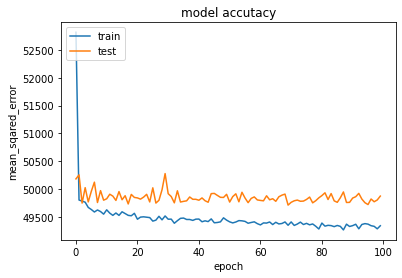

In [ ]:
## summarize history for accuracy
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model accutacy')
plt.ylabel('mean_sqared_error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

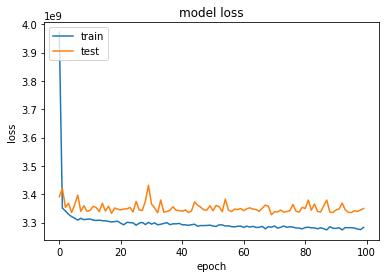

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')


In [ ]:
sc

StandardScaler()

In [ ]:
y_pred  = regressor.predict(x_test)

79/79 [==============================] - 0s 1ms/step


In [ ]:
## R2 score 
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.011524831533074043
